# Laboratorio 2: Armado de un esquema de aprendizaje automático

## Integrantes:

* Devesa, María Roberta
* Feldfeber, Ivana
* Finzi, Nadia
* Kinigsberg, Ezequiel 
* Villafañe, Roxana Noelia

### Consignas

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1) Los datos del dataset contienen información sobre créditos hipotecarios que se les otorgó a ciertas personas, junto con su historial crediticio. 

2) La variable objetivo sería el TARGET, que hace referencia a si se pagó o no el préstamo. Vale 0 cuando el cliente pagó el préstamo, y 1 cuando no. 

3) Los atributos disponibles son los siguientes:

* 'LOAN' (préstamo): Monto de la solicitud de préstamo
* 'MORTDUE': Monto adeudado de la hipoteca existente 
* 'VALUE': Valor de la propiedad actual
* 'YOJ': Años en el trabajo actual
* 'DEROG': Número de reportes derogados
* 'DELINQ': Número de créditos adeudados
* 'CLAGE': Antigüedad de la línea de crédito más antigua (en meses)
* 'NINQ': Número de líneas de crédito recientes
* 'CLNO': Número de líneas de crédito
* 'DEBTINC': Relación deuda-ingresos

4) Creemos que los atributos más determinantes podrían ser DEROG, DELINQ y DEBTINC. 

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [ ]:
clf = SGDClassifier(random_state= 100)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=100, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Resultados para conjunto de train 

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      1232
           1       0.80      0.30      0.43       251

    accuracy                           0.87      1483
   macro avg       0.84      0.64      0.68      1483
weighted avg       0.86      0.87      0.84      1483



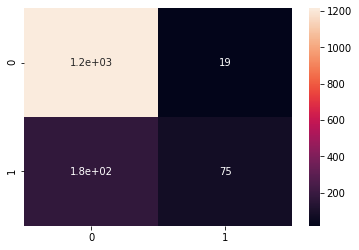

In [ ]:
y_pred_train = clf.predict(X_train)
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot= True)
print('Resultados para conjunto de train \n')
print(classification_report(y_train, y_pred_train))

Resultados para conjunto de test 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       313
           1       0.85      0.29      0.44        58

    accuracy                           0.88       371
   macro avg       0.87      0.64      0.68       371
weighted avg       0.88      0.88      0.86       371



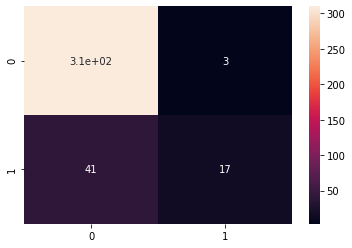

In [ ]:
y_pred = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)
print('Resultados para conjunto de test \n')
print(classification_report(y_test, y_pred))

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
param_grid = {
    'loss': ['hinge', 'log', 'perceptron'],
    'alpha': [0.001, 0.0001, 0.00001],
    'penalty': ['elasticnet'],
    'l1_ratio': [0.2, 0.5, 0.75]
}

cv = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)
cv.fit(X_train, y_train)

results = cv.cv_results_
df = pd.DataFrame(results)

df[['param_loss', 'param_alpha', 'param_penalty', 'param_l1_ratio', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,param_loss,param_alpha,param_penalty,param_l1_ratio,mean_test_score,std_test_score,rank_test_score
3,hinge,0.001,elasticnet,0.5,0.869178,0.005933,1
0,hinge,0.001,elasticnet,0.2,0.867829,0.008460,2
6,hinge,0.001,elasticnet,0.75,0.867156,0.003635,3
1,log,0.001,elasticnet,0.2,0.865149,0.016159,4
7,log,0.001,elasticnet,0.75,0.865149,0.014678,4
4,log,0.001,elasticnet,0.5,0.863798,0.012634,6
12,hinge,0.0001,elasticnet,0.5,0.855016,0.010325,7
9,hinge,0.0001,elasticnet,0.2,0.852321,0.010835,8
10,log,0.0001,elasticnet,0.2,0.848988,0.022089,9
16,log,0.0001,elasticnet,0.75,0.844936,0.021565,10


In [ ]:
cv.best_params_

{'alpha': 0.001, 'l1_ratio': 0.5, 'loss': 'hinge', 'penalty': 'elasticnet'}

In [ ]:
cv.best_estimator_

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.5, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=100, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

Resultados para el mejor modelo conjunto train 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1232
           1       0.89      0.24      0.37       251

    accuracy                           0.87      1483
   macro avg       0.88      0.61      0.65      1483
weighted avg       0.87      0.87      0.83      1483



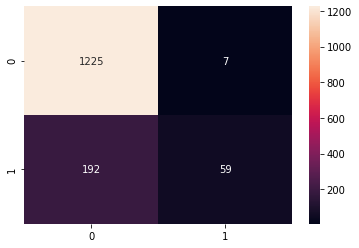

In [ ]:
y_pred_train = cv.predict(X_train)
print('Resultados para el mejor modelo conjunto train \n')
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train, y_pred_train))

Resultados para el mejor modelo conjunto test 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       313
           1       0.85      0.29      0.44        58

    accuracy                           0.88       371
   macro avg       0.87      0.64      0.68       371
weighted avg       0.88      0.88      0.86       371



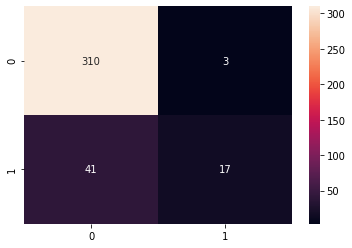

In [ ]:
y_pred = cv.predict(X_test)
print('Resultados para el mejor modelo conjunto test \n')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
print(classification_report(y_test, y_pred))

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [ ]:
clf_tree = DecisionTreeClassifier(random_state = 100)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



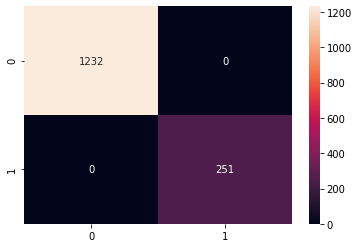

In [ ]:
y_pred_train = clf_tree.predict(X_train)
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train, y_pred_train))

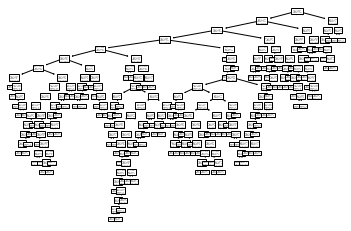

In [ ]:
from sklearn import tree
tree.plot_tree(clf_tree);

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       313
           1       0.72      0.66      0.68        58

    accuracy                           0.91       371
   macro avg       0.83      0.80      0.81       371
weighted avg       0.90      0.91      0.90       371



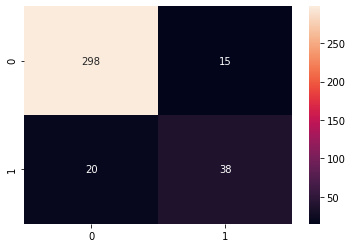

In [ ]:
y_pred = clf_tree.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt='g')
print(classification_report(y_test, y_pred))

### **Observaciones**

1. Para probar:

Consider performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand to give your tree a better chance of finding features that are discriminative.

2. Ver por qué la de entrenamiento dio sospechosamente perfecta (overfitting?). Estaría bueno imprimir el árbol para ver cómo se distribuyeron. 

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15,20,22],
    'min_samples_leaf': [1, 5, 10, 15],
    }

cv_dt = GridSearchCV(DecisionTreeClassifier(random_state=100), param_grid, scoring='accuracy', cv=5)
cv_dt.fit(X_train, y_train)

results = cv_dt.cv_results_
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
22,entropy,5,10,0.880647,0.003456,1
5,gini,10,5,0.879991,0.019750,2
4,gini,10,1,0.879991,0.023914,3
2,gini,5,10,0.879302,0.005732,4
10,gini,15,10,0.877955,0.014463,5
14,gini,20,10,0.877955,0.014463,5
18,gini,22,10,0.877955,0.014463,5
3,gini,5,15,0.877289,0.011670,8
6,gini,10,10,0.877282,0.014953,9
20,entropy,5,1,0.875935,0.008521,10


In [ ]:
cv_dt.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1232
           1       0.94      0.39      0.55       251

    accuracy                           0.89      1483
   macro avg       0.92      0.69      0.75      1483
weighted avg       0.90      0.89      0.87      1483



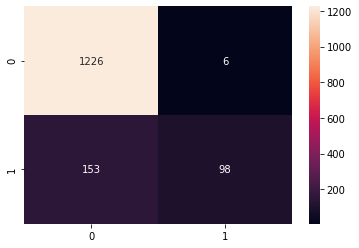

In [ ]:
# Conjunto de train
y_pred_train = cv_dt.predict(X_train)
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='g')
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       313
           1       0.86      0.41      0.56        58

    accuracy                           0.90       371
   macro avg       0.88      0.70      0.75       371
weighted avg       0.89      0.90      0.88       371



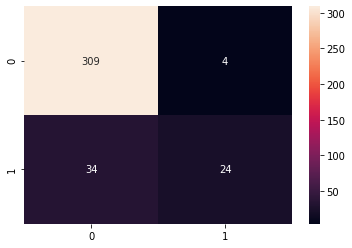

In [ ]:
# Conjunto de test
y_pred = cv_dt.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt='g')
print(classification_report(y_test, y_pred))

## Conclusión del trabajo


En esta etapa se optimizaron dos algoritmos de aprendizaje automático:
* SGDClassifier
* DecisionTreeClassifier

disponibles en la librería de scikit-learn. 

En una primera instancia, se trabajó con los hiperparámetros por defecto, y en la segunda etapa se optimizaron los hiperparámetros correspondientes a cada algoritmo. La semilla aleatoria se fijo en 100. 

**SGDClassifier**

Trabajando con los hiperparámetros por defecto se obtuvieron:

* training: 87% accuracy
* testing: 88% accuracy

También se reportaron valores de Precision, Recall, F1 y la  matriz de confusión correspondiente en todos los casos. 

*Optimización de SGDClassifier*

Mediante una busqueda en grilla, se optimizaron los siguientes hiperparámetros: 
* loss, 
* l1_ratio, 
* penalty (se dejo fija en elasticnet) y 
* alpha. 

Los mejores valores se obtuvieron con:
* alpha: 0.001
* l1_ratio: 0.5
* loss: 'hinge'

Los valores obtenidos son similares al algoritmo sin optimizar. 
Si observamos con cuidado las dos matrices de confusión de TEST, los valores que caen por fuera de la diagonal principal (los errores) sin idénticos en ambos casos. 


**DecisionTreeClassifier**

Trabajando con los valores por defecto se obtuvieron:

* training: 100% accuracy
* testing: 91% accuracy

También se reportaron valores de Precision, Recall, F1 y la  matriz de confusión correspondiente en todos los casos. 

*Optimización de DecisionTreeClassifier*

Con GridSearchCV se optimizaron los siguientes hiperparámetros:

* criterion: 'gini', 'entropía'.
* max_depth: 5, 10, 15, 20, 22. 
* min_samples_leaf: 1, 5, 10, 15. 

Los hiparparámetros que dan como resultado los mejores valores de accuracy son:

* criterion: 'entropy'.
* max_depth: 5.
* min_samples_leaf: 10.

obteniendo para

* training: 89% de exactitud
* testing: 90% de exactitud

También se reportan los valores de Precision, Recall, F1 y matriz de confusión correspondiente. 